<font size = '7' color = 'red'><b>ch10. Pandas</b></font> <font size = '5' color = 'red'><b>(데이터프레임, 시리즈)</b></font>

- pip install pandas (cmd 창에서 실행)

# 1절. Pandas 패키지
- 데이터 분석을 위한 반드시 알아야 할 피키지. numpy를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계.
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치 처리, 크기변경(열삭제/추가, 행삭제/추가), 데이터 정렬, 데이터 분할/병합, 통계처리, 부분데이터추출, 파일입출력, 레이블링, 시각화용이, ...

In [2]:
import pandas as pd
pd.__version__

'2.1.4'

In [4]:
data = pd.read_json('data/ch10_member1.json', encoding="CP949") # default : UTF-8
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [5]:
data = pd.read_json('data/ch10_member2.json') # default로 read
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [9]:
member1 = pd.read_csv('data/ch09_member2.csv', header=None, 
                      names=['name','age','email','address'], 
                      encoding='UTF-8')
member1

,name,age,email,address
0,name,age,email,address
1,홍길동,20,hong@hong.com,서울시 강동구
2,박길서,27,park@hong.com,서울시 강서구
3,박길남,31,gilk@hong.com,서울시 강남구
4,박길북,30,kimk@hong.com,서울시 강북구
5,신길서,35,gik@hong.com,서울시 강서구
6,신길동,28,park@hong.com,서울시 강동구


# 2절. 데이터프레임 만들기

## 2.1 딕셔너리를 이용하여 데이터프레임 만들기

In [10]:
d = {'name':['홍길동', '신길동'], 'age':[20, 30]}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용하여 데이터프레임 만들기

In [11]:
d = {'name':'홍길동', 'age': 20}, {'name':'신길동', 'age':30}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.3 read_csv()

In [16]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='CP949')
df.shape # 행, 열

(17, 22)

In [18]:
df.head(2) # 상위 2줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [19]:
pd.options.display.max_columns = 22 # 최대 데이터프레임의 표현될 수 있는 column(열) 수
df.head(2) # 상위 2줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


## 2.4 sklearn, statsmodels, seaborn 등의 라이브러리에서 데이터프레임 불러오기

In [23]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets").data
iris.tail() # 끝 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름(행, 열) 지정하기

In [46]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


In [47]:
# 열 이름 지정하기
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


In [48]:
member_df = pd.concat([member_df, member_df])
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구


In [49]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [50]:
member_df.index = ['동','서','남','북','중','신','동','서','남','북','중','신']
member_df

,name,age,email,address
동,홍길동,20,hong@hong.com,서울시 강동구
서,박길서,27,park@hong.com,서울시 강서구
남,박길남,31,gilk@hong.com,서울시 강남구
북,박길북,30,kimk@hong.com,서울시 강북구
중,신길서,35,gik@hong.com,서울시 강서구
신,신길동,28,park@hong.com,서울시 강동구
동,홍길동,20,hong@hong.com,서울시 강동구
서,박길서,27,park@hong.com,서울시 강서구
남,박길남,31,gilk@hong.com,서울시 강남구
북,박길북,30,kimk@hong.com,서울시 강북구


In [51]:
member_df.index = range(len(member_df.index))
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,27,park@hong.com,서울시 강서구
8,박길남,31,gilk@hong.com,서울시 강남구
9,박길북,30,kimk@hong.com,서울시 강북구


In [52]:
# name을 행이름
# member_df = member_df.set_index("name")  # inplace=False 적용된 내용 return
member_df.set_index("name", inplace=True) # inplace=True 데이터프레임에 적용
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,27,park@hong.com,서울시 강서구
박길남,31,gilk@hong.com,서울시 강남구
박길북,30,kimk@hong.com,서울시 강북구
신길서,35,gik@hong.com,서울시 강서구
신길동,28,park@hong.com,서울시 강동구
홍길동,20,hong@hong.com,서울시 강동구
박길서,27,park@hong.com,서울시 강서구
박길남,31,gilk@hong.com,서울시 강남구


In [53]:
# 행이름을 column에 편입시키기
# member_df = member_df.reset_index("name")  # inplace=False 적용된 내용 return
member_df.reset_index("name", inplace=True) # inplace=True 데이터프레임에 적용
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,27,park@hong.com,서울시 강서구
8,박길남,31,gilk@hong.com,서울시 강남구
9,박길북,30,kimk@hong.com,서울시 강북구


In [61]:
name = member_df['name'] # 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     박길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     박길북
10    신길서
11    신길동
Name: name, dtype: object

In [60]:
member = member_df.loc[0] # 0번 인덱스 행 => 시리즈
print(type(member))
member

<class 'pandas.core.series.Series'>


name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [62]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [63]:
member_df['age'] = member_df['age'].astype('float64') # 데이터프레임의 열의 타입을 변경

In [64]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     12 non-null     object 
 1   age      12 non-null     float64
 2   email    12 non-null     object 
 3   address  12 non-null     object 
dtypes: float64(1), object(3)
memory usage: 516.0+ bytes


# 4절. 부분데이터 조회

- 특정열, 특정행, 특정행의 특정열, 특정조건의 행 모든열, 특정조건의 행의 특정열

In [66]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


## 4.1 단일열 조회

In [70]:
member['name'].to_frame() # 시리즈

,name
0,홍길동
1,박길서
2,박길남
3,박길북
4,신길서
5,신길동


## 4.2 loc[]을 이용한 이름(열,행)으로 조회

- 단일행, 여러행, 여러열, 행과 열을 동시에 접근
- member.loc[행(슬라이싱), 열(슬라이싱)]

In [73]:
# 단일행
member.loc[0] # 시리즈

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [75]:
# 여러행
member.loc[0:5] # 0행 부터 5행까지

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


In [78]:
# 여러열(name열부터 email열까지 == age 포함)
member.loc[:, 'name':'email'] # from:to:step

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,27,park@hong.com
2,박길남,31,gilk@hong.com
3,박길북,30,kimk@hong.com
4,신길서,35,gik@hong.com
5,신길동,28,park@hong.com


In [79]:
# 여러열(name열과 email열)
member.loc[:, ['name','email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,박길남,gilk@hong.com
3,박길북,kimk@hong.com
4,신길서,gik@hong.com
5,신길동,park@hong.com


In [81]:
# 1행부터 4행까지 name과 email
member.loc[1:4, ['name','email']]

,name,email
1,박길서,park@hong.com
2,박길남,gilk@hong.com
3,박길북,kimk@hong.com
4,신길서,gik@hong.com


In [83]:
# 1행과 4행 name과 email, address
member.loc[[1,4], ['name','email','address']]

,name,email,address
1,박길서,park@hong.com,서울시 강서구
4,신길서,gik@hong.com,서울시 강서구


In [86]:
# 1행~4행 name~email
member.loc[1:4, 'name':'email'] # loc 이용시 index이름과 column이름을 사용해야함

,name,age,email
1,박길서,27,park@hong.com
2,박길남,31,gilk@hong.com
3,박길북,30,kimk@hong.com
4,신길서,35,gik@hong.com


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회

- 몇번째 행부터 몇번째 행 앞까지, 몇번째 열부터 몇번째 열 앞까지. 음수도 가능

In [89]:
member.iloc[0:4] # 슬라이싱 from:to:step(to 앞까지만 출력)

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,서울시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구


In [90]:
member.iloc[0,0:3] # 0부터 3열 앞까지

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

In [91]:
# 맨 오른쪽 열을 제외하고 출력
member.iloc[:, :-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,27,park@hong.com
2,박길남,31,gilk@hong.com
3,박길북,30,kimk@hong.com
4,신길서,35,gik@hong.com
5,신길동,28,park@hong.com


In [92]:
# 0,2,4,6,... 짝수번째 행의 모든 열 출력
member.iloc[::2, 0:2]

,name,age
0,홍길동,20
2,박길남,31
4,신길서,35


In [93]:
# member의 행 순서를 역순 출력, 마지막 열은 제외
member.iloc[::-1, :-1]

,name,age,email
5,신길동,28,park@hong.com
4,신길서,35,gik@hong.com
3,박길북,30,kimk@hong.com
2,박길남,31,gilk@hong.com
1,박길서,27,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [95]:
# 30살 이상의 데이터 출력
member.loc[member['age']>30] # 인덱스 대신 조건

,name,age,email,address
2,박길남,31,gilk@hong.com,서울시 강남구
4,신길서,35,gik@hong.com,서울시 강서구


In [ ]:
# 시리즈에 문자함수
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [96]:
member['address'].str.find('강서구') !=- 1

0    False
1     True
2    False
3    False
4     True
5    False
Name: address, dtype: bool

In [98]:
# address에 '강서구'인 데이터의 name, age, address를 출력
member.loc[member['address'].str.find('강서구') != -1, ['name', 'age', 'address']]

,name,age,address
1,박길서,27,서울시 강서구
4,신길서,35,서울시 강서구


In [100]:
# 결측치 여부 확인
member.isna().sum()

name       0
age        0
email      0
address    0
dtype: int64

In [104]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
# 0 ~ 49
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [109]:
# species가 versicolor인 데이터 상위 3개의 모든 열
iris_df.loc[iris_df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [110]:
# species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.loc[iris_df['species'] == 'versicolor', 'sepal_length' : 'petal_width'].head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [117]:
iris_df.iloc[:, :-1][iris_df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [120]:
# iris_df.iloc[:, :-1][(iris_df['species'] == 'versicolor') & (iris_df['sepal_length'] > 6.2)].head()
iris_df.iloc[:, :-1][(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2)].head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
54,6.5,2.8,4.6,1.5
56,6.3,3.3,4.7,1.6


In [121]:
iris_df.loc[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2), ['sepal_length','sepal_width','species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# 5절. 데이터 추가/삭제

In [257]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,부산시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


In [258]:
import numpy as np
member['major'] = ['컴공', '전자', '전기', '컴공', '기계', np.nan]
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,27,park@hong.com,부산시 강서구,전자
2,박길남,31,gilk@hong.com,서울시 강남구,전기
3,박길북,30,kimk@hong.com,서울시 강북구,컴공
4,신길서,35,gik@hong.com,서울시 강서구,기계
5,신길동,28,park@hong.com,서울시 강동구,NaN


In [259]:
hobby = pd.DataFrame({'hobby':['먹기','놀기','자기','읽기','공부','산책']})
hobby

,hobby
0,먹기
1,놀기
2,자기
3,읽기
4,공부
5,산책


In [260]:
member = pd.concat([member, hobby], axis = 1)
member

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,먹기
1,박길서,27,park@hong.com,부산시 강서구,전자,놀기
2,박길남,31,gilk@hong.com,서울시 강남구,전기,자기
3,박길북,30,kimk@hong.com,서울시 강북구,컴공,읽기
4,신길서,35,gik@hong.com,서울시 강서구,기계,공부
5,신길동,28,park@hong.com,서울시 강동구,NaN,산책


In [261]:
member.drop(['hobby', 'major'], axis=1, inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,부산시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
4,신길서,35,gik@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강동구


In [262]:
# 행삭제
member.drop(4, inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,27,park@hong.com,부산시 강서구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
5,신길동,28,park@hong.com,서울시 강동구


In [263]:
member = member.drop(1)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
5,신길동,28,park@hong.com,서울시 강동구


In [264]:
member.index = range(len(member))
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길남,31,gilk@hong.com,서울시 강남구
2,박길북,30,kimk@hong.com,서울시 강북구
3,신길동,28,park@hong.com,서울시 강동구


# 6절. 정렬

In [162]:
member = pd.read_csv('data/ch09_member2.csv')
member.sort_index(ascending=False) # 인덱스 정렬

,name,age,email,address
5,신길동,28,park@hong.com,서울시 강동구
4,신길서,35,gik@hong.com,서울시 강서구
3,박길북,30,kimk@hong.com,서울시 강북구
2,박길남,31,gilk@hong.com,서울시 강남구
1,박길서,27,park@hong.com,부산시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


In [163]:
# 특정열의 값 기준 정렬
member.sort_values(by=['name','age'], inplace=True)
member

,name,age,email,address
2,박길남,31,gilk@hong.com,서울시 강남구
3,박길북,30,kimk@hong.com,서울시 강북구
1,박길서,27,park@hong.com,부산시 강서구
5,신길동,28,park@hong.com,서울시 강동구
4,신길서,35,gik@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


# 7절. 기초통계 분석

- count : NA(결측치)를 제외한 갯수
- min : 
- max : 
- sum : 
- mean :
- std : 표준편차
- var : 분산
- quantile : 분위수(1사분위수, 2사분위수, 3사분위수)
- median : 중간값
- corr : 상관관계

In [180]:
iris_df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [181]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [182]:
iris_df.iloc[:, :-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [183]:
iris_df.iloc[:, :-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [184]:
iris_df.describe() # 수치형 데이터의 갯수, 평균, 표준편차, 최소최대, 사분위수 출력

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [186]:
iris_df['species'].describe() # 범주형 데이터

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [188]:
iris_df.describe(include='all') # 수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [189]:
iris_df[iris_df['species'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절. 그룹화

In [195]:
iris_df.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [196]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [197]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica


In [ ]:
# 연습문제 1

In [199]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 연습문제 2

In [223]:
x = iris.iloc[:, :-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [226]:
y = iris.iloc[:, -1]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# 연습문제 3

In [200]:
temp = iris.head(50)
temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# 연습문제 4

In [227]:
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [ ]:
# 연습문제 5

In [210]:
iris_versicolor = iris[iris['species'] == 'versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [ ]:
# 연습문제 6

In [231]:
iris_df = pd.concat([x, y], axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# 연습문제 7

In [232]:
iris.iloc[:, :-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [ ]:
# 연습문제 8

In [236]:
r = iris.iloc[:,:-1].corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

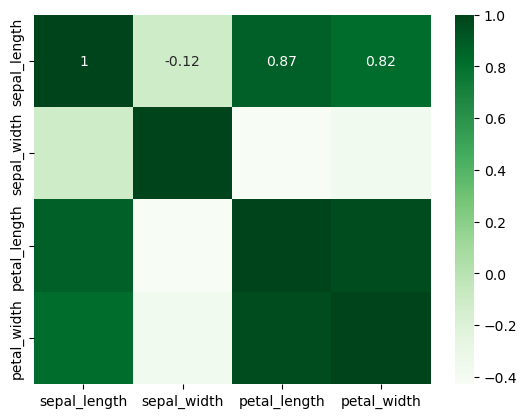

In [237]:
import seaborn as sns
sns.heatmap(r, annot=True, cmap="Greens")
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트 pip install seaborn --upgrade
#                                               pip show seaborn

In [ ]:
# 연습문제 9

In [265]:
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
